In [1]:
%matplotlib inline

In [7]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [9]:
img_link = 'images/road/image.000722.png'


In [10]:
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 11
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]

# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
    
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny(imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)



Max_gap = 5
Min_length = 40
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)
height, width = img.shape[:2]
mat = np.zeros((height,width))

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

iReducFactor = 2
iStart = iReducFactor // 2
blackReduc = mat[iStart::iReducFactor, iStart::iReducFactor]
blackReduc = blackReduc.astype('uint8')

img_and = cv2.bitwise_and(blackReduc, edges_dilated)

dilated = cv2.dilate(img_and, np.ones((1,1), dtype=np.uint8))
colored = np.zeros((dilated.shape[0], dilated.shape[1], 3), dtype='uint8')

colored[:,:,0] = edges_dilated
colored[:,:,0] -= dilated
colored[:,:,1] = dilated

#cv2.imwrite('classification_building.png', colored)


NameError: name 'edges_dilated' is not defined

In [11]:
#Hough 

def update(minLineLength=20, maxLineGap=1):
    img = cv2.imread(img_link, cv2.IMREAD_COLOR)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
    for l in lines:
        for x1,y1,x2,y2 in l:
            cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



    tools.multiPlot(1, 2, (img, edges),
                        ('Original image', 'Canny'),
                        cmap_tuple=(cm.gray, cm.gray))
interact(update, minLineLength = (0, 150, 5), maxLineGap = (0, 30, 1))

interactive(children=(IntSlider(value=20, description='minLineLength', max=150, step=5), IntSlider(value=1, de…

<function __main__.update(minLineLength=20, maxLineGap=1)>

In [12]:
img_color = cv2.imread(img_link, cv2.IMREAD_COLOR)

# to convert b,g,r cv2 picture into standard r,g,b format 
b,g,r = cv2.split(img_color)
img_color = cv2.merge( [r,g,b])

minLineLength = 20
maxLineGap = 1

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255, 255, 255),3)
        cv2.line(img_color,(2*x1,2*y1),(2*x2,2*y2),(255,0,0),3)

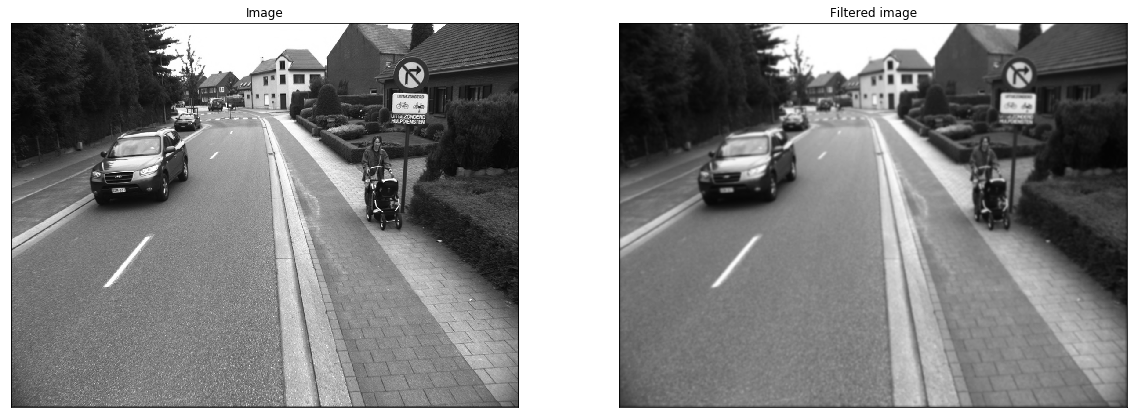

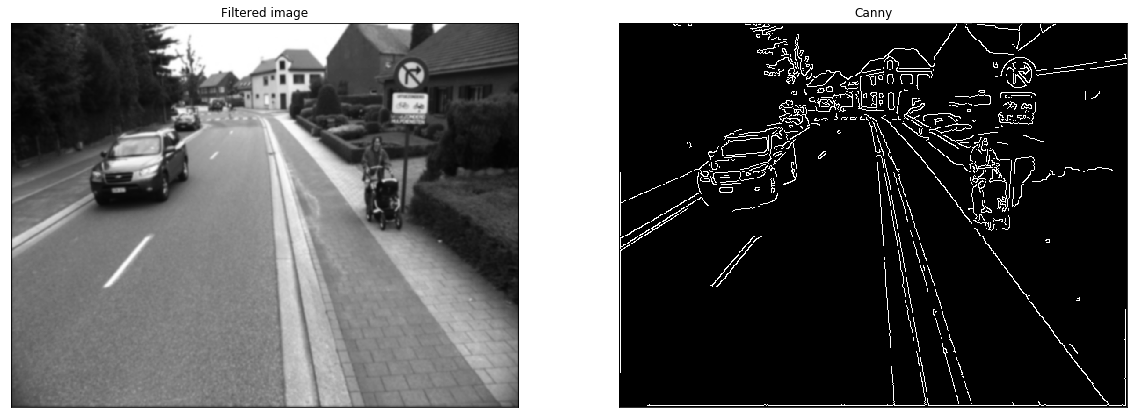

NameError: name 'colored' is not defined

In [13]:
tools.multiPlot(1, 2, (input_img, imgFilt), ('Image', 'Filtered image'), cmap_tuple=(cm.gray, cm.gray,))
tools.multiPlot(1, 2, (imgFilt, edges), ('Filtered image', 'Canny'), cmap_tuple=(cm.gray, cm.gray,))
tools.multiPlot(1, 2, (edges, colored), ('Canny', 'Hough'), cmap_tuple=(cm.gray, cm.gray,))

'''
cv2.imwrite('input.png', input_img)
cv2.imwrite('blur.png', imgFilt)
cv2.imwrite('edges.png', edges)
cv2.imwrite('edges_dilated.png', edges_dilated)
cv2.imwrite('colored.png', cv2.cvtColor(colored, cv2.COLOR_RGB2BGR))
cv2.imwrite('image_lines.png', cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
'''

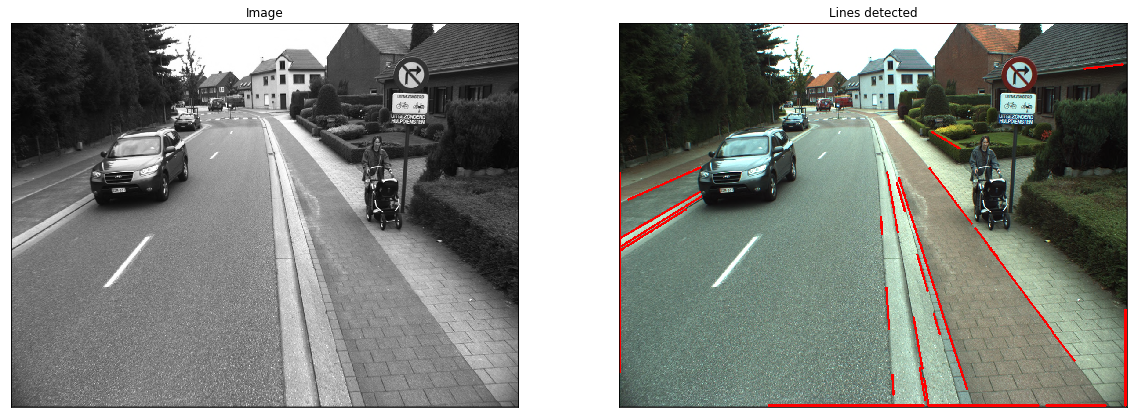

In [14]:
tools.multiPlot(1, 2, (input_img, img_color), ('Image', 'Lines detected'), cmap_tuple=(cm.gray, cm.gray,))